<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#卷积基础" data-toc-modified-id="卷积基础-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>卷积基础</a></span></li><li><span><a href="#卷积神经网络结构" data-toc-modified-id="卷积神经网络结构-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>卷积神经网络结构</a></span><ul class="toc-item"><li><span><a href="#卷积层" data-toc-modified-id="卷积层-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>卷积层</a></span></li><li><span><a href="#汇聚层（子采样层、池化层）" data-toc-modified-id="汇聚层（子采样层、池化层）-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>汇聚层（子采样层、池化层）</a></span></li><li><span><a href="#网络结构" data-toc-modified-id="网络结构-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>网络结构</a></span></li></ul></li><li><span><a href="#参数学习" data-toc-modified-id="参数学习-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>参数学习</a></span><ul class="toc-item"><li><span><a href="#误差项的计算" data-toc-modified-id="误差项的计算-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>误差项的计算</a></span></li><li><span><a href="#偏导数的计算" data-toc-modified-id="偏导数的计算-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>偏导数的计算</a></span></li></ul></li></ul></div>

# 卷积神经网络
卷积神经网络一般由***卷积层***、***汇聚层***和***全连接层***交叉堆叠而成的***前馈神经网络***，使用***误差反向传播算法***进行训练。

## 卷积基础

**一维卷积**：信号发生器每个时刻$t$产生一个信号$x_t$，生成信号序列$\left(x_1,x_2,\cdots,x_t,\cdots\right)$。其信息衰减率为$w_k$，即在$k-1$个时间步长后信息为原来的$w_k$倍，将$\left(w_1,w_2,\cdots,w_k,\cdots\right)$称为滤波器或卷积核。

设滤波器序列为$\left(w_1,w_2,\cdots,w_k,\cdots,w_m\right)$，其与信号序列$\left(x_1,x_2,\cdots,x_t,\cdots\right)$的卷积
$$y_t=\sum_{k=1}^m w_k\cdot x_{t-k+1}$$

信号序列$\mathbf{x}$和滤波器$\mathbf{w}$的卷积
$$\mathbf{y}=\mathbf{w}\otimes\mathbf{x}$$

**二维卷积**：给定二维图像数据$X\in\mathbb{R}^{M\times N}$和二维滤波器$W\in\mathbb{R}^{m\times n}$，其卷积为
$$y_{ij}=\sum_{u=1}^m\sum_{v=1}^n w_{uv}\cdot x_{i-u+1, j-v+1}$$

**互相关**：给定二维图像数据$X\in\mathbb{R}^{M\times N}$和二维卷积核$W\in\mathbb{R}^{m\times n}$，其互相关定义为
$$y_{ij}=\sum_{u=1}^m\sum_{v=1}^n w_{uv}\cdot x_{i+u-1,j+v-1}$$

图像数据$X\mathbb{R}^{M\times N}$和卷积核$W\in\mathbb{R}^{m\times n}$的互相关
$$Y=W\otimes X$$
其中$Y\in\mathbb{R}^{M-m+1,N-n+1}$为输出矩阵。

互相关和卷积的区别在于卷积核发生了反转（在两个维度上颠倒次序，即旋转$180$度）。因此互相关也称为不反转卷积。

**卷积扩展**
1. 卷积核步长：卷积核在滑动时的间隔；  
2. 数据零填充：在输入数据各维度的两端进行补零。

假设一维卷积的输入向量元素个数为$M$，卷积核元素个数为$m$，卷积核步长为$s$，输入数据两端各$p$个零填充，则卷积输出向量个数为$\left(n-m+2p\right)/s+1$。

**窄卷积（Narrow Convolution）**：步长$s=1$，两端补零$p=0$，卷积输出长度为$M-m+1$。  
**宽卷积（Wide Convolution）**：步长$s=1$，两端补零$p=m-1$，卷积后输出长度为$M+m-1$。  
**等宽卷积（Equal-Width Convolution）**：步长$s=1$，两端补零$p=\left(m-1\right)/2$，卷积后输出长度为$M$。

**卷积交换性**  
二维图像数据$X\in\mathbb{R}^{M\times N}$和二维卷积核$Y\in\mathbb{R}^{m\times n}$，对图像数据$X$的两个维度进行零填充（两端各补$m-1$个和$n-1$个零），得到全填充的图像数据$\tilde{X}\in\mathbb{R}^{\left(M+m-1\right)\times\left(N+n-1\right)}$。图像数据$X$和卷积核$W$的宽卷积
$$W\tilde{\otimes}X\triangleq W\otimes\tilde{X}$$
其中$\tilde{\otimes}$为宽卷积操作。

宽卷积具有交换性，即
$$W\tilde{\otimes}X=X\tilde{\otimes}W$$

***卷积求导***

设$Y=W\otimes X$，其中$X\in\mathbb{R}^{M\times N},W\in\mathbb{R}^{m\times n},Y\in\mathbb{R}^{\left(M-m+1\right)\times\left(N-n+1\right)}$，  
$Y$的标量函数$f\left(Y\right)$关于$w_{uv}$的偏导
$$\begin{align}
\frac{\partial f\left(Y\right)}{\partial w_{uv}}&=\sum_{i=1}^{M-m+1}\sum_{j=1}^{N-n+1}\frac{\partial f\left(Y\right)}{\partial y_{ij}} \frac{\partial y_{ij}}{\partial w_{uv}}  \\
&=\sum_{i=1}^{M-m+1}\sum_{j=1}^{N-n+1}\frac{\partial f\left(Y\right)}{\partial y_{ij}} x_{i+u-1,j+v-1}
\end{align}$$
$Y$的标量函数$f\left(Y\right)$关于$W$的偏导
$$\frac{\partial f\left(Y\right)}{\partial W}=\frac{\partial f\left(Y\right)}{\partial Y}\otimes X$$
$Y$的标量函数$f\left(Y\right)$关于$x_{st}$的偏导
$$\begin{align}
\frac{\partial f\left(Y\right)}{\partial x_{st}}&=\sum_{i=1}^{M-m+1}\sum_{j=1}^{N-n+1} \frac{\partial f\left(Y\right)}{\partial y_{ij}} \frac{\partial y_{ij}}{\partial x_{st}} \\
&=\sum_{i=1}^{M-m+1}\sum_{j=1}^{N-n+1} \frac{\partial f\left(Y\right)}{\partial y_{ij}}  w_{s-i+1,t-j+1}
\end{align}$$
其中，当$\left(s-i+1\right)<1,\left(s-i+1\right)>m,\left(t-j+1\right)<1,\left(t-j+1\right)>n$时，$w_{s-i+1,t-j+1}=0$，即相当于对$W$进行了$p=\left(M-m,N-n\right)$的零填充。
$Y$的标量函数$f\left(Y\right)$关于$X$的偏导
$$\begin{align}
\frac{\partial f\left(Y\right)}{\partial X}&=\mathbf{rot180}\left(\frac{\partial f\left(Y\right)}{\partial Y}\right)\tilde{\otimes} W \\
&=\mathbf{rot180}\left(W\right)\tilde{\otimes} \frac{\partial f\left(Y\right)}{\partial Y}
\end{align}$$

## 卷积神经网络结构

### 卷积层
卷积层提取空间局部区域特征。

卷积层结构：
* 输入特征映射组：$X\in\mathbb{R}^{M\times N\times D}$为三维张量，其中每个切片矩阵$X^d\in\mathbb{R}^{M\times N}$为一个输入特征映射，$1\leq d\leq D$。
* 输出特征映射组：$Y\in\mathbb{R}^{M'\times N' \times P}$为三维张量，其中每个切片矩阵$Y^p\in\mathbb{R}^{M' \times N'}$为一个输出特征映射，$1 \leq p \leq P$。
* 卷积核：$W\in\mathbb{R}^{m\times n\times D\times P}$为四维张量，其中每个切片矩阵$W^{p,d}\in\mathbb{R}^{m\times}$为一个二维卷积核，$1\leq d\leq D,1 \leq p \leq P$。
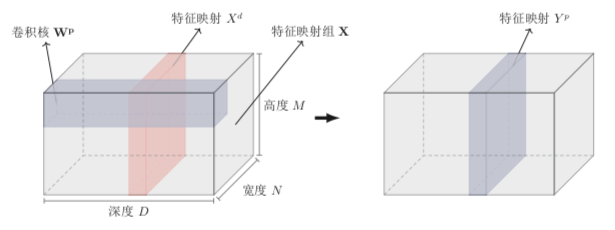

输入特征映射组$X$到输入特征映射$Y^p$
$$\begin{align}
Z^p&=W^p\otimes X+b^p=\sum_{d=1}^D W^{p,d}\otimes X^d+b^p \\
Y^p &= f\left(Z^p\right)
\end{align}$$
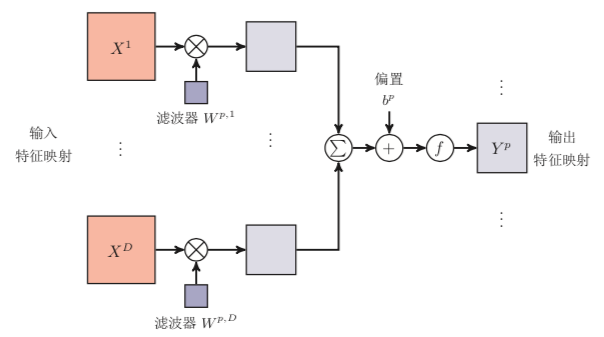

在输入为$X\in\mathbb{R}^{M\times N\times D}$，卷积核为$W\in\mathbb{R}^{m\times n\times D\times P}$，输出为$Y\in\mathbb{R}^{M'\times N' \times P}$的卷积层，共需要$\left(m\times n\right)\times D\times P+P$个参数。

### 汇聚层（子采样层、池化层）
汇聚层进行特征选择，降低特征数量。

汇聚层的输入层特征映射组为$X\in\mathbb{R}^{M\times N\times D}$，对其中每个特征映射$X^d$，将其划分为多个区域$R_{m,n}^d,1\leq m\leq M,1\leq n\leq N$。汇聚是对每个区域进行采样，得到一个值作为该区域的概括。

常用汇聚函数：
* 最大汇聚（Maximum Pooling）：取区域内最大值作为输出
$$Y_{m,n}^d=\max_{i\in R_{m,n}^d} x_i$$
* 平均汇聚（Mean Pooling）：去区域内平均值作为输出
$$Y_{m,n}^d=\frac{1}{|R_{m,n}^d|}\sum_{i\in R_{m,n}^d}x_i$$

典型汇聚层是将每个特征映射划分为$k\times k$个不重叠区域，然后使用最大汇聚方式进行采样。
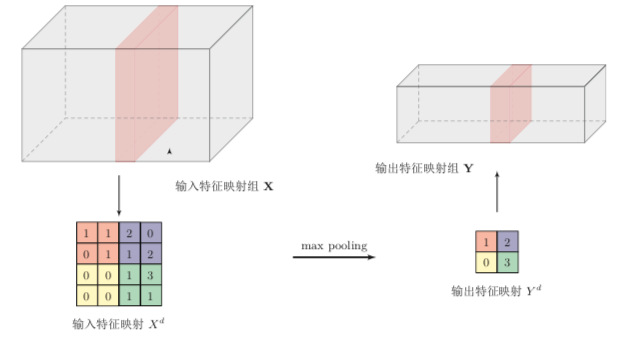

### 网络结构

典型的卷积神经网络是有卷积层、汇聚层、全连接层交叉堆叠而成。
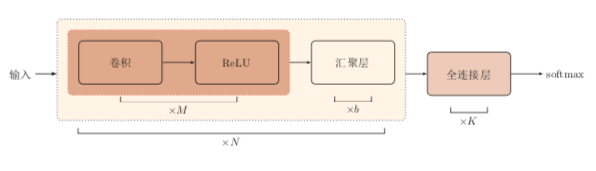

## 参数学习
卷积神经网络中，可学习的参数为卷积核中的权重以及偏置。卷积神经网络通过误差反向传播算法来进行参数学习。

### 误差项的计算

第$l$层卷积层的第$p\left(1\leq p\leq P\right)$个特征映射净输入
$$Z^{(l, p)}=\sum_{d=1}^{D} W^{(l, p, d)} \otimes X^{(l-1, d)}+b^{(l, p)}$$
其中，$X^{(l-1, d)}\in\mathbb{R}^{M\times N\times D}$为第$l-1$层的输入特征映射，$W^{(l, p, d)}$为卷积核，$b^{(l, p)}$为偏置。

第$l$层卷积层的第$p$个误差项$\delta^{\left(l,p\right)}$
$$\begin{align}
\delta^{(l, p)} &\triangleq \frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial Z^{(l, p)}} \\
&=\frac{\partial X^{(l, p)}}{\partial Z^{(l, p)}} \cdot \frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial X^{(l, p)}} \\
&=f_{l}^{\prime}\left(Z^{(l)}\right) \odot \sum_{d=1}^{D}\left(\operatorname{rot} 180\left(W^{(l+1, p, d)}\right) \tilde{\otimes} \frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial Z^{(l+1, p)}}\right)  \\
&=f_{l}^{\prime}\left(Z^{(l)}\right) \odot \sum_{d=1}^{D}\left(\operatorname{rot} 180\left(W^{(l+1, p, d)}\right) \tilde{\otimes} \delta^{(l+1, p)}\right)
\end{align}$$

第$l$层汇聚层的第$p$个误差项$\delta^{\left(l,p\right)}$
* 最大汇聚：第$l+1$层误差项$\delta^{\left(l+1,p\right)}$直接传递到第$l$层对应区域中的最大值对应位置，该区域中其他位置误差项为$0$；
* 平均混居：第$l+1$层误差项$\delta^{\left(l+1,p\right)}$平均分配到第$l$层对应区域中的所有位置上。

### 偏导数的计算

损失函数$\mathcal{L}\left(Y,\hat{Y}\right)$关于第$l$层卷积核$W^{\left(l,p,d\right)}$的偏导数      
$$\begin{align} 
\frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial W^{(l, p, d)}} &=\frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial Z^{(l, p)}} \otimes X^{(l-1, d)} \\ &=\delta^{(l, p)} \otimes X^{(l-1, d)} 
\end{align}$$

损失函数$\mathcal{L}$关于第$l$层偏置$b^{\left( l,p\right)}$的偏导数
$$\frac{\partial \mathcal{L}(Y, \hat{Y})}{\partial b^{(l, p)}}=\sum_{i, j}\left[\delta^{(l, p)}\right]_{i, j}$$